# Homework 4 

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic) for 7 days (Include each day of the week)

1. Create two bar graphs of the power consumption per hour.

    * One bar graph has 24 bars showing the average consumption
    * One bar graph has 7x24 bars showing the average demand 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [1]:
import pandas as pd
import datetime  as datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('RollingSystemDemand_20220225_0225.csv', names=['Name', 'Date', 'Usage'])
df.drop(df.tail(1).index,inplace=True)
df.drop(df.head(1).index,inplace=True)
df["Date"] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M%S')
new_df = df[['Date', "Usage"]]

In [3]:
# df.head()
times = pd.to_datetime(new_df.Date)
new_grp=df.groupby([times.dt.hour])

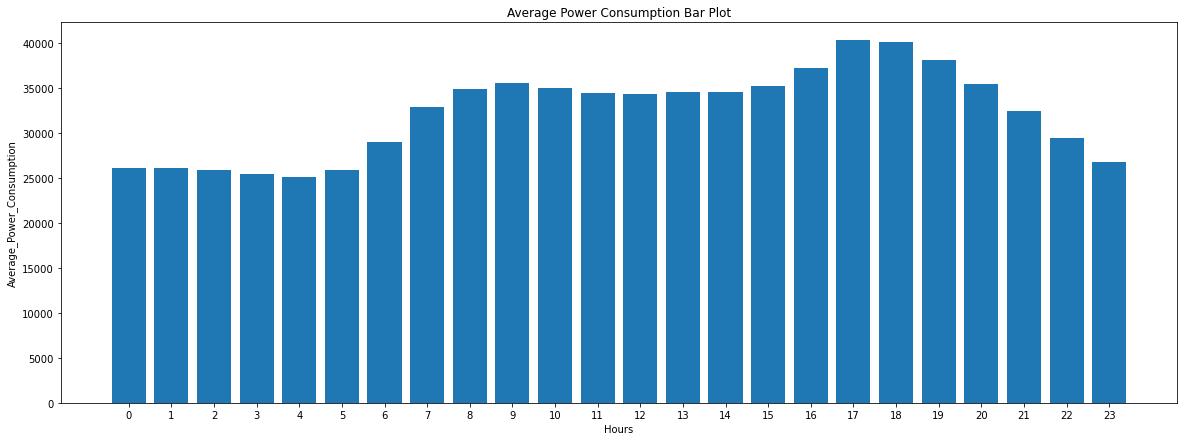

In [4]:
mean_df = new_grp.Usage.mean()
# figure size
plt.figure(figsize = (20, 7))
plt.bar(mean_df.index, mean_df.values)
# x-label
plt.xlabel('Hours')
# y-label
plt.ylabel('Average_Power_Consumption')
plt.title("Average Power Consumption Bar Plot")
plt.xticks(range(0,24))
plt.show()


In [5]:
new_df2=new_df.set_index('Date')
new_df2=new_df2.resample('H').sum()

Text(0, 0.5, 'Consumption')

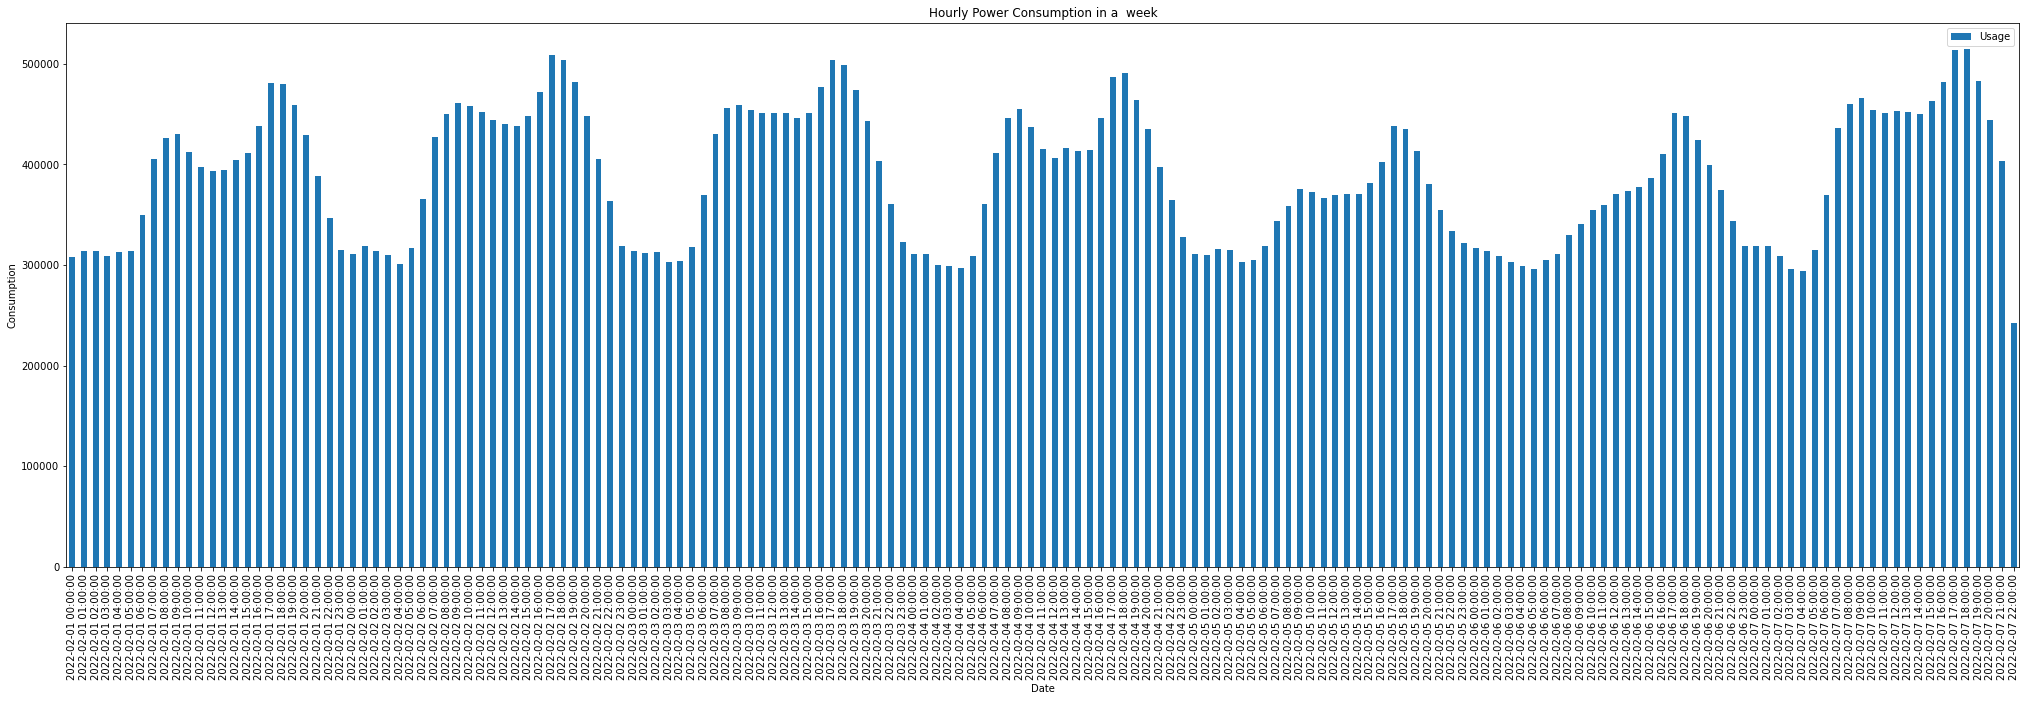

In [7]:
new_df2.plot.bar(y='Usage', use_index=True, figsize=(35, 10))
plt.title("Hourly Power Consumption in a  week")
plt.ylabel("Consumption")